In [1]:
# Install cartopy ,un comment the below
# !apt-get install -y python3-cartopy
# !pip install cartopy


zsh:1: command not found: apt-get

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


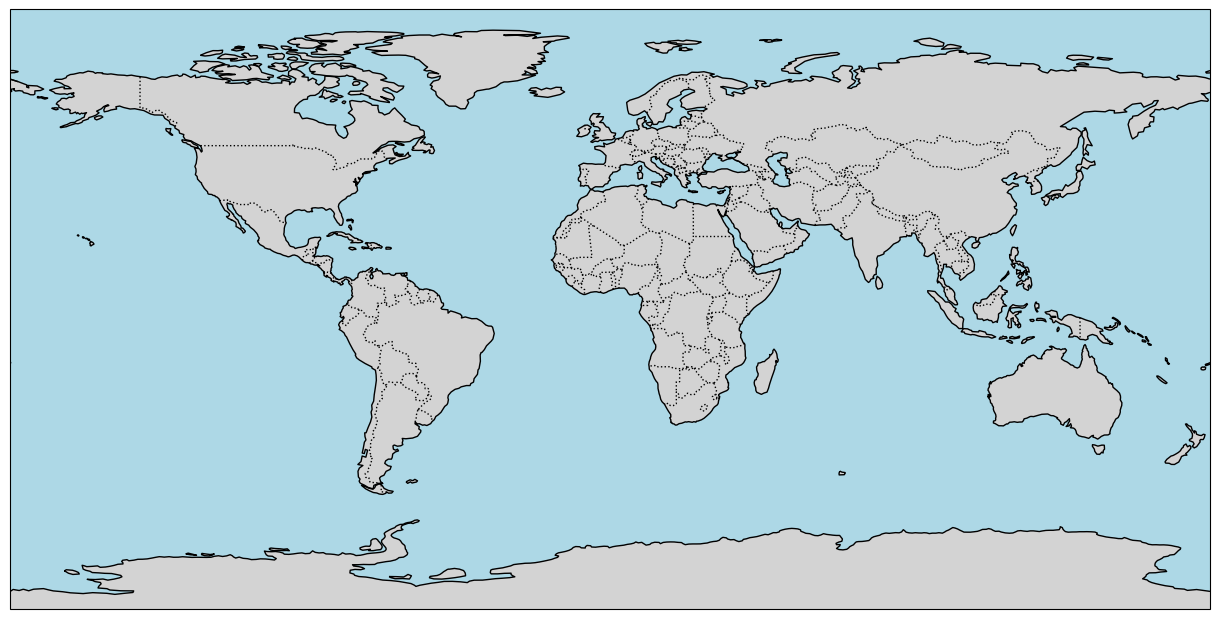

In [29]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Dataset: Flyway paths with coordinates
# Reference: https://datazone.birdlife.org/sowb/spotflyway
flyways = {
    "Pacific Flyway": [
        [-145.500, 60.333], [-132.383, 56.533], [-123.150, 49.050], [-79.550, 8.950], [-79.850, -1.400], [-70.950, -17.400],
    ],
    "Central Flyway": [
        [-112.500, 53.400],[-106.580,50.450],[-98.277,50.185],[-89.783,15.183],[-85.083,11.033],[-59.933,-30.583],
    ],
    "Atlantic Flyway": [
        [-72.500, 67.500], [-64.633, 45.800], [-85.350, 42.316], [-52.800, 5.000],  [-37.000, -4.000],  [-66.000, -54.000],
    ],
    "East Atlantic Flyway": [
        [32.000, 60.000], [6.500, 53.500], [-5.353, 36.140], [-16.000, 20.933], [-16.000, 16.000], [-15.000, 11.000],
    ],
    "Black Sea-Mediterranean Flyway": [
        [94.500, 54.500], [29.000, 41.200], [35.400, 32.500], [35.000, 29.500], [-7.500, 12.000], [31.000, 6.000],
    ],
    "East Asia-East Africa": [
        [68.000, 51.300], [49.500, 37.466], [43.200, 13.000], [32.500, 0.350], [22.000, -19.000], [31.100, -29.650],
    ],
    "East Asia–Australasia Flyway": [
        [156.301, 58.258], [124.000, 40.000], [120.250, 23.200], [114.000, 22.500], [138.500, -19.500], [121.000, -19.000], 
    ],
    "Central Asian Flyway": [
        [65.944, 56.334], [80.050, 29.400], [77.566, 27.150], [70.200, 23.500], [75.516, 16.984],[79.500, 10.400],
    ]
}

# Plot setup
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))

ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

# Colors for each flyway
colors = ["red", "blue", "green", "purple", "orange", "cyan", "brown", "yellow"]

# Prepare line objects and flyway data
lines = []
flyway_data = []
for i, (flyway, points) in enumerate(flyways.items()):
    lons, lats = zip(*points)
    line, = ax.plot([], [], label=flyway, color=colors[i % len(colors)], transform=ccrs.Geodetic(), linewidth=2)
    lines.append(line)
    flyway_data.append((lons, lats))

# Function to update animation
def update(frame):
    for i, line in enumerate(lines):
        lons, lats = flyway_data[i]
        if frame < len(lons):  # North-to-south movement
            line.set_data(lons[:frame + 1], lats[:frame + 1])
        else:  # South-to-north movement
            reverse_frame = frame - len(lons)
            line.set_data(lons[:len(lons) - reverse_frame - 1], lats[:len(lats) - reverse_frame - 1])
    return lines

# Total frames: twice the length of the longest flyway path for back-and-forth motion
max_length = max(len(points) for points in flyways.values())
total_frames = 2 * max_length

# Create animation
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=200, blit=True)

# Display animation 
HTML(ani.to_jshtml())

In [30]:
writergif = animation.PillowWriter(fps=5)
ani.save('birds-flyway.gif',writer=writergif)